In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Check whether multiple data points are associated with a single identifier
def matching(dataframe, identifier_column, data_column):
    # Focus on the id and data columns
    dataframe = dataframe.loc[:, [identifier_column, data_column]]
    dataframe = dataframe.drop_duplicates()
    # Only select id's that occur multiple times
    duplicates = dataframe[dataframe.duplicated(subset=identifier_column, keep=False)]

    print(duplicates.head())

    # Check wether the id's only occur once
    matched = dataframe.groupby(identifier_column)[data_column].count().unique().max() == 1
    print(f"columns {identifier_column} and {data_column} are ", end="")
    if matched: print("one-to-one")
    else:       print("one-to-many")
    print()

# Articles

In [7]:
articles = pd.read_csv("data/articles.csv")

In [8]:
# Print the first 5 articles to get a feel of the data
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [9]:
# We notice the article_id and product_code columns are interpreted as integers, which cuts off the leading 0
# Since all of the columns containing id, code or number represent nominal data, we interpret every column as a string
articles = pd.read_csv("data/articles.csv", dtype=str)
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,09,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,09,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [10]:
# All article_id entries are valid
articles["article_id"].str.fullmatch("^[0-9]{10}$").value_counts()

article_id
True    105542
Name: count, dtype: int64

In [11]:
# All product_code entries are valid
articles["product_code"].str.fullmatch("^[0-9]{7}$").value_counts()

product_code
True    105542
Name: count, dtype: int64

In [12]:
# Check whether product_code and prod_name are in a one-to-one relationship
matching(articles, "product_code", "prod_name")
# They are in a one-to-many relationship
# On first glance, the names of products with the same product_code are very similar, but this is hard to verify
# A possible interpretation is that the name contains more detailed information and that the code can be omissed

   product_code                 prod_name
0       0108775                 Strap top
2       0108775             Strap top (1)
46      0146706  Tanktop body white 3PACK
48      0146706           3P TANKTOP BODY
70      0156610              Connor pants
columns product_code and prod_name are one-to-many



In [13]:
# All other id-name pairs of columns match fully and are thus one-to-one
matching(articles, "product_type_no", "product_type_name")
matching(articles, "graphical_appearance_no", "graphical_appearance_name")
matching(articles, "colour_group_code", "colour_group_name")
matching(articles, "perceived_colour_value_id", "perceived_colour_value_name")
matching(articles, "perceived_colour_master_id", "perceived_colour_master_name")
matching(articles, "department_no", "department_name")
matching(articles, "index_code", "index_name")
matching(articles, "index_group_no", "index_group_name")
matching(articles, "section_no", "section_name")
matching(articles, "garment_group_no", "garment_group_name")

Empty DataFrame
Columns: [product_type_no, product_type_name]
Index: []
columns product_type_no and product_type_name are one-to-one

Empty DataFrame
Columns: [graphical_appearance_no, graphical_appearance_name]
Index: []
columns graphical_appearance_no and graphical_appearance_name are one-to-one

Empty DataFrame
Columns: [colour_group_code, colour_group_name]
Index: []
columns colour_group_code and colour_group_name are one-to-one

Empty DataFrame
Columns: [perceived_colour_value_id, perceived_colour_value_name]
Index: []
columns perceived_colour_value_id and perceived_colour_value_name are one-to-one

Empty DataFrame
Columns: [perceived_colour_master_id, perceived_colour_master_name]
Index: []
columns perceived_colour_master_id and perceived_colour_master_name are one-to-one

Empty DataFrame
Columns: [department_no, department_name]
Index: []
columns department_no and department_name are one-to-one

Empty DataFrame
Columns: [index_code, index_name]
Index: []
columns index_code and i

In [14]:
# Only the detail_desc column contains nan values, but this is only 0.394 percent of all rows, which is negligable
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [15]:
articles.isna().sum() / articles.shape[0] * 100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

# Customers

In [16]:
customers = pd.read_csv("data/customers.csv")

In [17]:
# Print the first 5 customers to get a feel of the data
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [18]:
# All customer_id and postal_code entries are valid
customers["customer_id"].str.fullmatch("^[a-f0-9]{64}$").value_counts()

customer_id
True    1371980
Name: count, dtype: int64

In [19]:
customers["postal_code"].str.fullmatch("^[a-f0-9]{64}$").value_counts()

postal_code
True    1371980
Name: count, dtype: int64

In [20]:
# Print the distinct values in every column
for column in customers:
    print(column)
    print(customers[column].unique())
    print()

customer_id
['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'
 '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa'
 '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318' ...
 'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264'
 'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a'
 'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241']

FN
[nan  1.]

Active
[nan  1.]

club_member_status
['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']

fashion_news_frequency
['NONE' 'Regularly' nan 'Monthly']

age
[49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97.
 89. 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]

postal_code
['52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6e

In [21]:
# The FN and Active columns have 65 and 66 percent missing values, indicate this with a bool
# club_member_status, fashion_news_frequency and age have less than 1.2 procent missing values, which could be covered by using mean or median
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

In [22]:
customers.isna().sum() / customers.shape[0] * 100

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

<Axes: xlabel='age', ylabel='Count'>

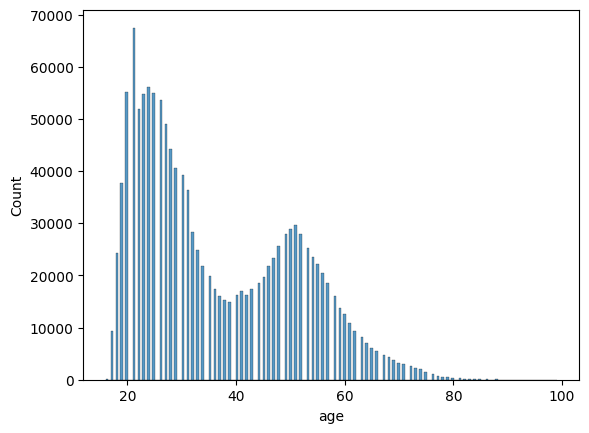

In [23]:
# All age values are between 16 and 99 and are not specifically distributed
# The mean is 36, but there is a peak around 20 and around 50 in the distribution

sns.histplot(customers["age"])

In [24]:
customers["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

# Transactions

In [25]:
# Interpret the article_id as a string like before and convert the date to a datetime format
transactions_train = pd.read_csv("data/transactions_train.csv", dtype={"article_id": str})
transactions_train["t_dat"] = pd.to_datetime(transactions_train["t_dat"])

In [26]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [27]:
transactions_train["customer_id"].str.fullmatch("^[a-f0-9]{64}$").value_counts()

customer_id
True    31788324
Name: count, dtype: int64

In [28]:
transactions_train["article_id"].str.fullmatch("^[0-9]{10}$").value_counts()

article_id
True    31788324
Name: count, dtype: int64

In [29]:
# No missing values in this table
transactions_train.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [30]:
# There are two distinct values in the sales_channel_id column
transactions_train.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [31]:
# id 2 is the dominant id
transactions_train["sales_channel_id"].value_counts()

sales_channel_id
2    22379862
1     9408462
Name: count, dtype: int64

In [32]:
# There are transactions from 2018-09-20 to 2020-09-22
transactions_train["t_dat"].describe()

count                         31788324
mean     2019-09-15 17:27:46.894452992
min                2018-09-20 00:00:00
25%                2019-03-28 00:00:00
50%                2019-08-25 00:00:00
75%                2020-03-29 00:00:00
max                2020-09-22 00:00:00
Name: t_dat, dtype: object

(array([17805., 17897., 17987., 18078., 18170., 18262., 18353., 18444.,
        18536.]),
 [Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10')])

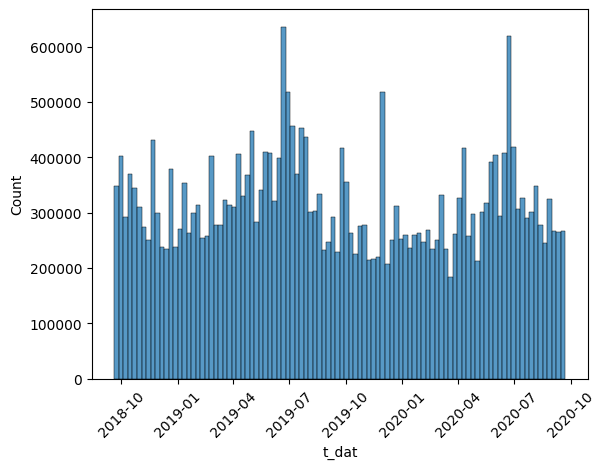

In [33]:
# Most notably, there are two peaks in the amount of transactions in July of both 2019 and 2020
sns.histplot(transactions_train["t_dat"], bins=100)
plt.xticks(rotation=45)

In [34]:
# All prices are between 0 and 0.59, which probabily means they are normalised
# Almost all of the prices are between 0 and 0.1
transactions_train["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

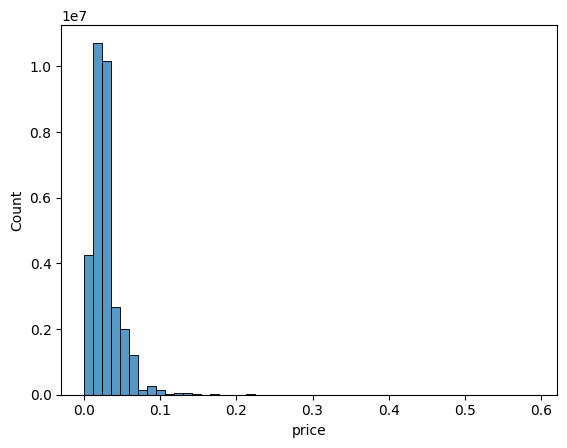

In [39]:
sns.histplot(transactions_train["price"], bins=50)

<Axes: xlabel='price', ylabel='Count'>

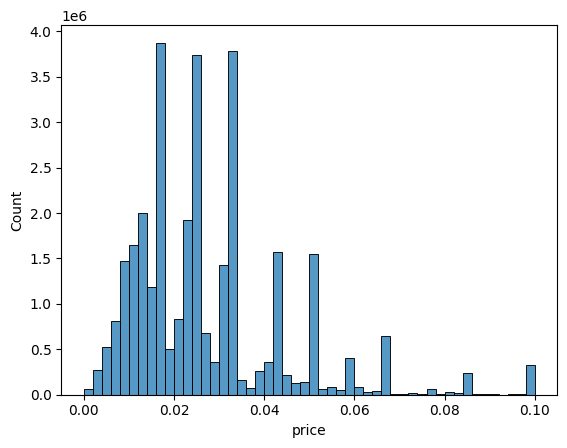

In [40]:
sns.histplot(np.clip(transactions_train["price"], 0, 0.1), bins=50)